In [1]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [4]:
cap = cv2.VideoCapture("Gait Dystonia - Case Study 24.mp4")

#check the fps
#fps = cap.get(cv2.CAP_PROP_FPS) 
#print(fps)

myarray = np.empty(shape=(1,33,4))

start = time.time()

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    idx=0
    while cap.isOpened():
        ret, frame = cap.read()
        
        #set specific frames sequence by vedio
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx* 4)
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        #print(results.pose_landmarks)
        #print("--------------------------------------")
        
        if results.pose_landmarks != None:
            key_list= []
            for data_point in results.pose_landmarks.landmark:
                key_list.append([data_point.x,data_point.y,data_point.z,time.time()])    
            mat = np.array(key_list)
            myarray = np.vstack([myarray,[mat]])
        
        idxx=time.time()
        idx+=1
        path="/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/frames3"
        cv2.imwrite(os.path.join(path , '{}.png'.format(idxx)),image)
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            idx=0
            
            
end = time.time()
print(end - start)
cap.release()
cv2.destroyAllWindows()



13.490352392196655


In [5]:
np.set_printoptions(threshold=np.inf)
print(myarray)

[[[ 6.90232502e-310  6.90232502e-310  2.91272172e-316  2.91272172e-316]
  [ 2.94587788e-316  2.98433832e-316  2.91642391e+257  2.42831373e-312]
  [ 0.00000000e+000  9.53546696e-322  2.91902995e-316  2.91593434e-316]
  [ 2.88919629e-316  7.95445690e-322  2.96002871e-316  2.97940319e-316]
  [ 1.58101007e-322  1.58101007e-322  2.97940319e-316  0.00000000e+000]
  [ 2.97940557e-316  4.79243676e-322  2.96002871e-316  6.90232502e-310]
  [ 1.58101007e-322  1.58101007e-322  2.91370116e-316  0.00000000e+000]
  [ 3.16202013e-322  1.58101007e-322  2.91272884e-316  0.00000000e+000]
  [ 1.34385856e-321  6.32404027e-322  2.91251461e-316  4.34777768e-322]
  [ 2.12199579e-314  6.01122893e+175  7.01782770e+151  5.03848856e+223]
  [ 2.70822228e+243  1.94827891e+233  9.01530012e+218  7.52226515e+199]
  [ 9.49439229e+170  2.56994130e+151  8.56838455e+170  3.95947439e-034]
  [ 3.31036972e-028  7.35663747e-321  2.91291698e-316  6.90232502e-310]
  [ 0.00000000e+000  0.00000000e+000  7.01782770e+151  5.0384885

In [6]:
key_array = np.delete(myarray, 0, 0)
np.set_printoptions(threshold=np.inf)
print(key_array.shape)


(150, 33, 4)


In [7]:
ankle=[]
for i in range(len(key_array)):
    t=key_array[i][28][3]
    x=key_array[i][24][1]-key_array[i][28][1]
    ankle.append([x])
    ankle[i].append(t)
ankle_array = np.array(ankle)
print(ankle_array)

[[-3.86557758e-01  1.62980542e+09]
 [-3.91211331e-01  1.62980542e+09]
 [-3.77333999e-01  1.62980542e+09]
 [-3.32776785e-01  1.62980542e+09]
 [-3.53620172e-01  1.62980542e+09]
 [-3.85570735e-01  1.62980542e+09]
 [-3.97399634e-01  1.62980542e+09]
 [-4.13491964e-01  1.62980542e+09]
 [-4.22634721e-01  1.62980542e+09]
 [-4.22108293e-01  1.62980542e+09]
 [-4.14665937e-01  1.62980542e+09]
 [-3.82523865e-01  1.62980542e+09]
 [-3.39237839e-01  1.62980542e+09]
 [-3.57465178e-01  1.62980542e+09]
 [-3.78271520e-01  1.62980542e+09]
 [-3.84881258e-01  1.62980542e+09]
 [-3.95871490e-01  1.62980542e+09]
 [-4.11819369e-01  1.62980542e+09]
 [-4.13042367e-01  1.62980542e+09]
 [-3.98208141e-01  1.62980542e+09]
 [-3.41382146e-01  1.62980542e+09]
 [-3.59920382e-01  1.62980542e+09]
 [-3.86558205e-01  1.62980542e+09]
 [-4.02640998e-01  1.62980542e+09]
 [-4.14286375e-01  1.62980542e+09]
 [-4.16745275e-01  1.62980542e+09]
 [-4.16107565e-01  1.62980542e+09]
 [-4.04367387e-01  1.62980542e+09]
 [-3.73098284e-01  1

In [8]:
myarray[0][28]

array([3.33824920e+151, 3.77673144e+209, 1.28898526e+248, 3.64469672e+088])

In [9]:
df = pd.DataFrame(ankle_array,columns=['y','t'])
print(df)

            y             t
0   -0.386558  1.629805e+09
1   -0.391211  1.629805e+09
2   -0.377334  1.629805e+09
3   -0.332777  1.629805e+09
4   -0.353620  1.629805e+09
..        ...           ...
145 -0.404506  1.629805e+09
146 -0.406337  1.629805e+09
147 -0.399387  1.629805e+09
148 -0.393640  1.629805e+09
149 -0.389245  1.629805e+09

[150 rows x 2 columns]


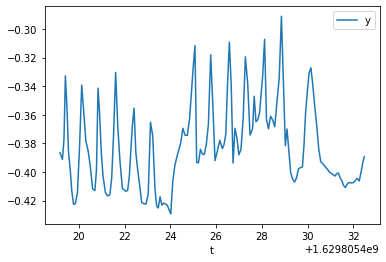

In [10]:
df.plot(x ='t', y='y', kind = 'line')
plt.show()

In [7]:
mp_holistic.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

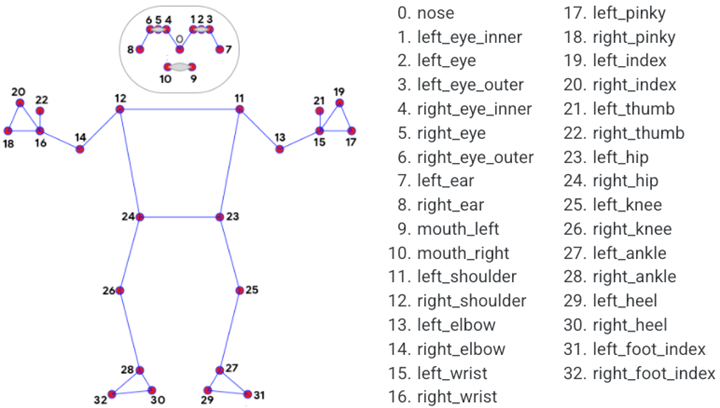